<a href="https://colab.research.google.com/github/20173132hanaram/-/blob/master/hello_xor_%EC%95%84%EB%8B%B4%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XOR 이해하기

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

1. AND 데이터로 바꾸어서 해보기
2. XOR 데이터로 바꾸어서 해보기

In [ ]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
#xor - gate
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [ ]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

2= 데이터의 차원

* 안되는 네트워크 구조 예제. 되도록 고쳐봅시다. 

In [ ]:
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis_ori = tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [ ]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
#train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [ ]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [ ]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
vcost =[]

In [ ]:
for step in range(20001):

    cost1, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
    vcost.append(cost1)
    if step %1000 ==0:
        
        print(cost1)

0.78779125
0.6897575
0.64546293
0.54582626
0.330419
0.20076849
0.1294803
0.08680922
0.05966243
0.041681428
0.029446974
0.020968815
0.015017975
0.01080278
0.0077966843
0.005641794
0.0040917955
0.0029718727
0.0021620472
0.0015747582
0.0011481323


Text(0.5, 0, 'epoch')

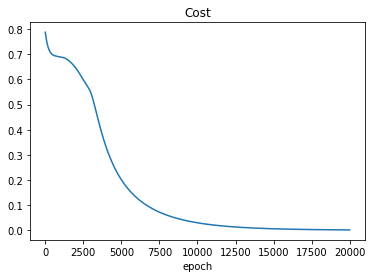

In [ ]:
plt.plot(vcost)
plt.title('Cost')
plt.xlabel('epoch')

In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[1,1]]})
print(test1[0][0])

0.0011515652


In [ ]:
for i in range(4):
 print(x_data[i], y_data[i] ,'----predicted : ',test1)

[0. 0.] [0.] ----predicted :  [[0.00115157]]
[0. 1.] [1.] ----predicted :  [[0.00115157]]
[1. 0.] [1.] ----predicted :  [[0.00115157]]
[1. 1.] [0.] ----predicted :  [[0.00115157]]


In [ ]:
test1 = sess.run(hypothesis, feed_dict={X:[[0.1,0]]})